In [1]:
#调包
import pandas as pd
import numpy as np
import os

In [2]:
# 获取当前代码文件所在的绝对目录
current_dir = os.path.dirname(os.path.abspath('Code')) 

# 获取父目录即"python"文件夹路径
parent_dir = os.path.dirname(current_dir)  

# 拼接得到data目录的绝对路径
data_dir = os.path.join(parent_dir, "Data") 
results_dir = os.path.join(parent_dir, "Results") 

# 得到example.csv的绝对路径
data_file = os.path.join(data_dir, "2Investor_Sentiment_Data.xlsx")

# 读取文件
df = pd.read_excel(data_file,sheet_name = 1)
df.head(5)

,yearmo,SENT,SENT_ORTH,pdnd,ripo,nipo,cefd,s,indpro,consdur,consnon,consserv,recess,employ,cpi
0,196507,-1.954588,-2.063409,26.450001,35.299999,8,19.270000,0.14,31.850599,63.500000,163.800003,213.699997,0,60965,31.600000
1,196508,-1.964418,-2.156318,24.730000,28.000000,8,19.690001,0.14,31.985300,66.000000,163.399994,215.000000,0,61228,31.600000
2,196509,-1.856582,-2.092707,23.170000,-5.300000,17,17.580000,0.14,32.066101,70.599998,165.000000,216.399994,0,61490,31.600000
3,196510,-1.690299,-1.992642,21.010000,-4.400000,11,13.590000,0.13,32.389500,69.500000,170.600006,218.399994,0,61719,31.700001
4,196511,-1.710152,-1.849593,16.129999,1.500000,20,13.960000,0.14,32.524200,69.099998,169.800003,220.199997,0,61996,31.700001


In [3]:
#缺失值处理
# 检查是否存在 NaN 值
nan_check = df.isnull().sum().sum()

# 检查是否存在无穷大值
inf_check = df.isin([np.Inf, -np.Inf]).sum().sum()

# 处理NaN值或者无穷大值,使用均值填充 NaN 值
if nan_check > 0 or inf_check > 0:
    
    df = df.fillna(df.mean())

nan_check1 = df.isnull().sum().sum()

inf_check1 = df.isin([np.Inf, -np.Inf]).sum().sum()

print(nan_check1,inf_check1)

0 0


In [4]:
df1 = df[['pdnd', 'ripo', 'nipo', 'cefd', 's']]

s_bw = df[['SENT_ORTH']]

yearmo = df[['yearmo']]

df1.head(5)

,pdnd,ripo,nipo,cefd,s
0,26.450001,35.299999,8,19.270000,0.14
1,24.730000,28.000000,8,19.690001,0.14
2,23.170000,-5.300000,17,17.580000,0.14
3,21.010000,-4.400000,11,13.590000,0.13
4,16.129999,1.500000,20,13.960000,0.14


In [5]:
#取出6个宏观变量并进行处理
df2 = df[['indpro', 'consdur', 'consnon', 'consserv', 'employ']]

df3 = df[['recess','cpi']]

#对除了recess虚拟变量进行标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df2 = scaler.fit_transform(df2)

df2 = pd.DataFrame(df2 , columns = ['indpro', 'consdur', 'consnon', 'consserv', 'employ'])

#合并变量
df2 = pd.concat([df2,df3],axis = 1)

In [6]:
#处理indpro employ
variables = ['indpro', 'employ']

for var in variables:
    df2[f'g{var}'] = df2[var] / df2[var].shift(12) - 1

#处理consdur consnon consserv
variables = ['consdur','consnon','consserv']

for var in variables:
    df2[f'g{var}'] = (df2[var] / df2[var].shift(12))/(df2['cpi']/df2['cpi'].shift(12)) - 1

df2[['recess1']] = df[['recess']].shift(1)
df2

,indpro,consdur,consnon,consserv,employ,recess,cpi,gindpro,gemploy,gconsdur,gconsnon,gconsserv,recess1
0,-1.649547,-1.245514,-1.254402,-1.129572,-1.881976,0,31.600000,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.643883,-1.240598,-1.254825,-1.129161,-1.872076,0,31.600000,NaN,NaN,NaN,NaN,NaN,0.0
2,-1.640485,-1.231552,-1.253133,-1.128719,-1.862214,0,31.600000,NaN,NaN,NaN,NaN,NaN,0.0
3,-1.626885,-1.233715,-1.247209,-1.128087,-1.853594,0,31.700001,NaN,NaN,NaN,NaN,NaN,0.0
4,-1.621220,-1.234501,-1.248055,-1.127519,-1.843168,0,31.700001,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1.342441,2.791646,2.443626,2.232173,1.486622,0,283.700012,0.269412,0.205440,0.154311,0.171118,0.111893,0.0
680,1.373161,2.784567,2.545380,2.264636,1.501603,0,287.500000,0.175140,0.191975,-0.085840,0.065718,0.080777,0.0
681,1.406543,2.850840,2.520100,2.286804,1.515455,0,289.100006,0.196709,0.193591,-0.078514,0.060354,0.070158,0.0
682,1.408666,2.728716,2.539033,2.314435,1.529909,0,292.299988,0.167036,0.189216,-0.066447,0.073255,0.061586,0.0


In [7]:
#舍弃缺失值
df2.isnull().sum(axis = 0)

df2.dropna(axis = 'index', how = 'any', inplace = True)

In [8]:
#对代理变量预处理
#设置参数
scaler = StandardScaler()

#标准化
df1 = scaler.fit_transform(df1) 

#把array格式变为dataframe,修改列索引
df1 = pd.DataFrame(df1 , columns = ['pdnd', 'ripo', 'nipo', 'cefd', 's'])
df1.head(5)

,pdnd,ripo,nipo,cefd,s
0,2.472179,0.851240,-0.772115,1.532567,-0.302069
1,2.339252,0.483522,-0.772115,1.594771,-0.302069
2,2.218690,-1.193874,-0.401558,1.282269,-0.302069
3,2.051759,-1.148539,-0.648596,0.691330,-0.420745
4,1.674617,-0.851343,-0.278039,0.746129,-0.302069


In [9]:
df1.describe()

,pdnd,ripo,nipo,cefd,s
count,684.000000,6.840000e+02,6.840000e+02,6.840000e+02,684.000000
mean,0.000000,1.350447e-16,-4.155221e-17,-6.232831e-17,0.000000
std,1.000732,1.000732e+00,1.000732e+00,1.000732e+00,1.000732
min,-3.453895,-2.377622e+00,-1.101500e+00,-2.937244e+00,-1.488831
25%,-0.549013,-5.642207e-01,-7.721153e-01,-7.467699e-01,-0.776774
50%,-0.109079,-2.020441e-01,-3.192116e-01,5.299732e-02,-0.183393
75%,0.434415,2.351871e-01,5.042496e-01,5.776595e-01,0.528664
max,2.872506,6.467747e+00,5.115632e+00,2.422678e+00,3.139541


In [10]:
#用6期的简单移动平均值平滑
window = 6

for column in df1:
    df1[[column]] = df1[[column]].rolling(window = window).mean()

In [11]:
df1.head(10)

,pdnd,ripo,nipo,cefd,s
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,2.023293,-0.463476,-0.586836,1.097385,-0.321849
6,1.826865,-0.808526,-0.607423,1.016914,-0.321849
7,1.618458,-0.765710,-0.634872,1.004326,-0.321849
8,1.418423,-0.544911,-0.689769,0.965325,-0.321849
9,1.181808,-0.298087,-0.655458,1.082081,-0.302069


In [12]:
#删去NAN的行
df1 = df1.drop([0,1,2,3,4],axis = 0)

df1.head(10)

,pdnd,ripo,nipo,cefd,s
5,2.023293,-0.463476,-0.586836,1.097385,-0.321849
6,1.826865,-0.808526,-0.607423,1.016914,-0.321849
7,1.618458,-0.765710,-0.634872,1.004326,-0.321849
8,1.418423,-0.544911,-0.689769,0.965325,-0.321849
9,1.181808,-0.298087,-0.655458,1.082081,-0.302069
10,1.037288,-0.340904,-0.724080,1.180571,-0.321849
11,0.907195,-0.190626,-0.710356,1.207723,-0.302069
12,0.793975,-0.072252,-0.689769,1.174893,-0.282290
13,0.722746,-0.347620,-0.682907,1.021604,-0.262510
14,0.674315,-0.527281,-0.737804,0.998401,-0.242731


In [13]:
#pdnd和ripo滞后12个月
df1['pdnd_lag'] = df1['pdnd'].shift(12)

df1['ripo_lag'] = df1['ripo'].shift(12)

In [14]:
#查看和删除缺失值
df1.isnull().sum(axis = 0)

df1.dropna(axis = 'index', how = 'any', inplace = True)

df1.index = range(0,667)

In [15]:
df1

,pdnd,ripo,nipo,cefd,s,pdnd_lag,ripo_lag
0,0.804022,-0.952087,-0.916221,0.919906,-0.222952,2.023293,-0.463476
1,0.787277,-0.646495,-0.957394,0.893247,-0.262510,1.826865,-0.808526
2,0.739104,-0.582691,-0.964256,0.942615,-0.302069,1.618458,-0.765710
3,0.658472,-0.389597,-0.943670,0.987787,-0.361407,1.418423,-0.544911
4,0.441306,-0.243517,-0.895634,1.044561,-0.420745,1.181808,-0.298087
...,...,...,...,...,...,...,...
662,-0.600471,0.962898,1.506127,-1.005954,-0.084496,-1.214743,1.129127
663,-0.542637,0.702642,1.238503,-1.132584,-0.203172,-1.306710,1.027543
664,-0.268669,1.851129,0.662080,-1.203674,-0.321849,-1.236125,1.192932
665,0.004270,1.311307,0.133692,-1.195281,-0.460304,-1.105517,1.162708


In [16]:
df2 = df2.drop([12,13,14,15,16],axis = 0)
df2

,indpro,consdur,consnon,consserv,employ,recess,cpi,gindpro,gemploy,gconsdur,gconsnon,gconsserv,recess1
17,-1.513568,-1.228405,-1.236738,-1.121551,-1.722604,0,32.900002,-0.056510,-0.059147,-0.038667,-0.041062,-0.038174,0.0
18,-1.506608,-1.227815,-1.235680,-1.121172,-1.714775,0,32.900002,-0.052818,-0.059421,-0.036982,-0.040824,-0.038283,0.0
19,-1.523421,-1.232928,-1.234411,-1.121140,-1.713947,0,32.900002,-0.036758,-0.054664,-0.023618,-0.034306,-0.031936,0.0
20,-1.531680,-1.230765,-1.234199,-1.120666,-1.710145,0,33.000000,-0.019596,-0.048942,-0.021959,-0.033485,-0.031829,0.0
21,-1.517937,-1.224275,-1.233459,-1.120193,-1.712554,0,33.099998,-0.026981,-0.042692,-0.026983,-0.029081,-0.028714,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1.342441,2.791646,2.443626,2.232173,1.486622,0,283.700012,0.269412,0.205440,0.154311,0.171118,0.111893,0.0
680,1.373161,2.784567,2.545380,2.264636,1.501603,0,287.500000,0.175140,0.191975,-0.085840,0.065718,0.080777,0.0
681,1.406543,2.850840,2.520100,2.286804,1.515455,0,289.100006,0.196709,0.193591,-0.078514,0.060354,0.070158,0.0
682,1.408666,2.728716,2.539033,2.314435,1.529909,0,292.299988,0.167036,0.189216,-0.066447,0.073255,0.061586,0.0


In [17]:
#每个代理变量对6个宏观变量取残差 'pdnd', 'ripo', 'nipo', 'cefd', 's'

from sklearn.linear_model import LinearRegression

model_macro = LinearRegression()

X = df2[['gindpro','gemploy','gconsdur','gconsnon','gconsserv','recess1']]

for column in df1[['nipo','cefd','s','pdnd_lag','ripo_lag']]:
    
    y = df1[[column]]
    
    model_macro.fit(X, y)
    
    y_pred = model_macro.predict(X)
    
    df1[[column]] = y - y_pred
    
df1.head(5)

,pdnd,ripo,nipo,cefd,s,pdnd_lag,ripo_lag
0,0.804022,-0.952087,-0.982714,0.951374,-0.145486,1.981385,-0.424867
1,0.787277,-0.646495,-1.024542,0.924642,-0.184910,1.785003,-0.770003
2,0.739104,-0.582691,-1.034260,0.973931,-0.223668,1.576825,-0.727981
3,0.658472,-0.389597,-1.016829,1.018716,-0.282324,1.377085,-0.507629
4,0.441306,-0.243517,-0.967517,1.075766,-0.341801,1.140411,-0.260944


In [18]:
data_file = os.path.join(data_dir, "2S&P500_Re.xlsx")

df4 = pd.read_excel(data_file,sheet_name = 1)

df4.drop(df4.index[:17], inplace=True,axis = 0)

df4.index = range(0,667)

df4

,year,Re
0,1966.12,0.018926
1,1967.01,3.334469
2,1967.02,3.027787
3,1967.03,1.940686
4,1967.04,1.387548
...,...,...
662,2022.02,-3.059908
663,2022.03,-1.023129
664,2022.04,-0.009299
665,2022.05,-8.359060


In [19]:
#超额收益率提前一期
df4['Re_lag'] = df4['Re'].shift(-1)

df4 = df4.drop([666],axis = 0)
df1 = df1.drop([666],axis = 0)

In [20]:
#使用sklearn方法直接PLS
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components = 1)

X = df1[['nipo','cefd','s','pdnd_lag','ripo_lag']]

y = df4[['Re_lag']]

pls.fit(X, y)

print(pls.x_loadings_)

S_PLS = pd.DataFrame(pls.x_scores_, columns=['S_PLS'])

print(S_PLS)

[[ 0.474523  ]
 [-0.24417229]
 [ 0.54242789]
 [-0.43998363]
 [ 0.75757174]]
        S_PLS
0   -0.887802
1   -1.273545
2   -1.264765
3   -1.075034
4   -0.857899
..        ...
661  1.898934
662  1.614385
663  1.449891
664  1.519556
665  1.352839

[666 rows x 1 columns]


In [21]:
#回归预测收益率
from scipy import stats

import statsmodels.api as sm

X = sm.add_constant(S_PLS) #添加常数项

model = sm.OLS(y, X)

results = model.fit()

y_pred = pd.DataFrame(model.predict(results.params, X),columns=['pred'])

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Re_lag   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     12.02
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           0.000559
Time:                        17:07:30   Log-Likelihood:                -1807.9
No. Observations:                 666   AIC:                             3620.
Df Residuals:                     664   BIC:                             3629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.142      1.519      0.1

In [22]:
#计算相关系数
s_bw = s_bw.drop(s_bw.index[:17],axis = 0)
s_bw = s_bw.drop(s_bw.index[666],axis = 0)

s_bw = s_bw.reset_index(drop=True)

rho = np.corrcoef(s_bw.T, S_PLS.T)
print(rho)

[[1.         0.65901452]
 [0.65901452 1.        ]]


In [23]:
#BW指数回归
X_bw = s_bw

X_bw = sm.add_constant(X_bw) #添加常数项

model = sm.OLS(y,X_bw)

results=model.fit()

y_pred=pd.DataFrame(model.predict(results.params,X_bw),columns=['pred'])

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Re_lag   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.706
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.100
Time:                        17:07:30   Log-Likelihood:                -1812.5
No. Observations:                 666   AIC:                             3629.
Df Residuals:                     664   BIC:                             3638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2253      0.143      1.577      0.1

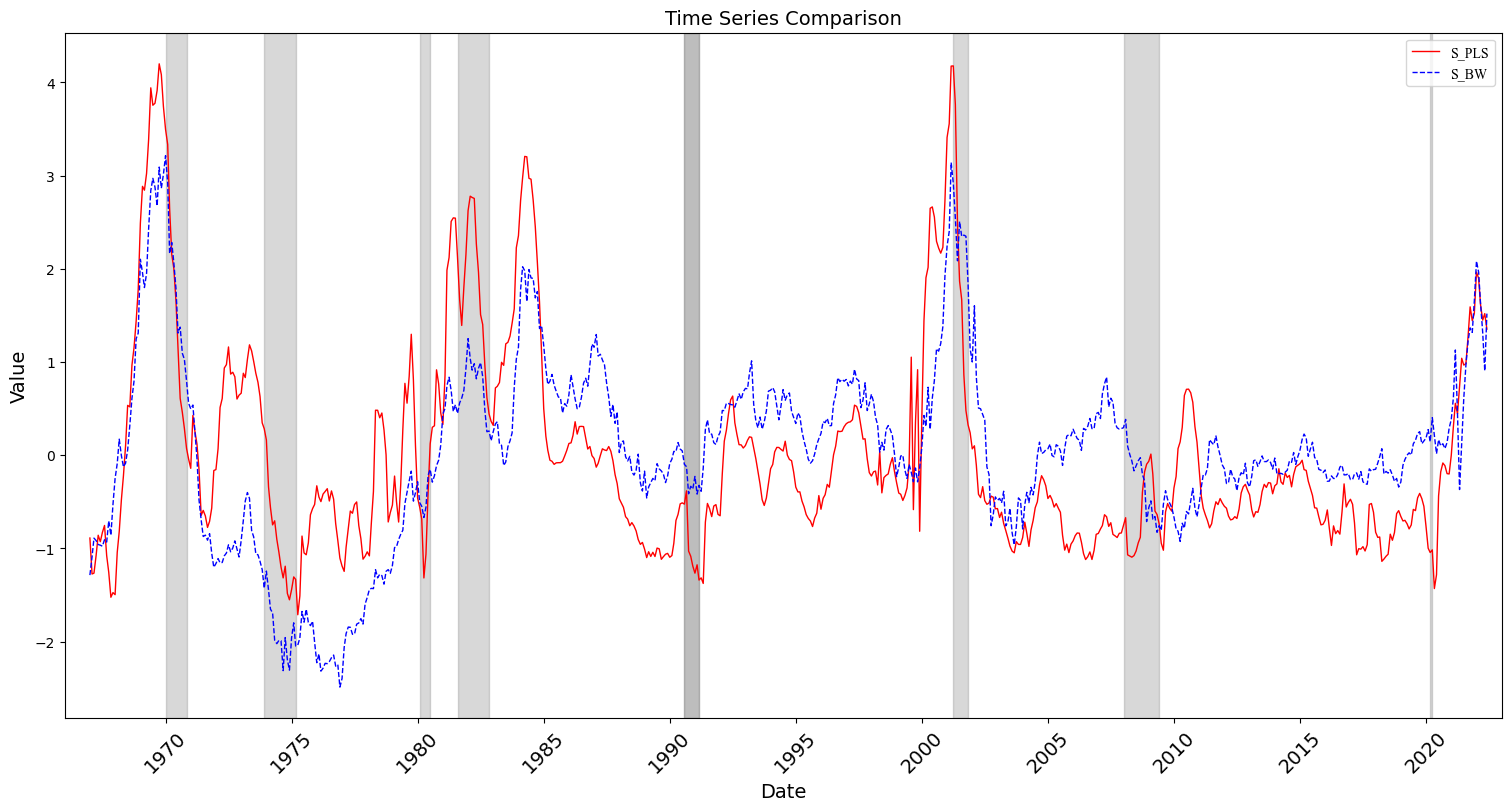

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt

# 输入数据
x = pd.date_range('1966-12', periods=666, freq='M')
y1 = S_PLS['S_PLS']
y2 = s_bw['SENT_ORTH']

fig, ax = plt.subplots(figsize=(15,8), layout='constrained')

# 绘制线图
ax.plot(x, y1, label='S_PLS', color='red', linewidth = 1)
ax.plot(x, y2, label='S_BW', linestyle='--', color='blue', linewidth = 1)

# 添加阴影区域
recession_dates = [(pd.to_datetime('1970-01'), pd.to_datetime('1970-11')),
                   (pd.to_datetime('1973-12'), pd.to_datetime('1975-03')),
                   (pd.to_datetime('1980-02'), pd.to_datetime('1980-07')),
                   (pd.to_datetime('1981-08'), pd.to_datetime('1982-11')),
                   (pd.to_datetime('1990-08'), pd.to_datetime('1991-03')),
                   (pd.to_datetime('1990-08'), pd.to_datetime('1991-03')),
                   (pd.to_datetime('2001-04'), pd.to_datetime('2001-11')),
                   (pd.to_datetime('2008-01'), pd.to_datetime('2009-06')),
                   (pd.to_datetime('2020-03'), pd.to_datetime('2020-04')),
                  ]

for start, end in recession_dates:
    plt.axvspan(start, end, color='grey', alpha=0.3)

# 设置日期格式化
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 设置刻度线位置：每5年
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 设置刻度线格式
ax.tick_params(axis='x', rotation=45, labelsize=14) # 旋转刻度标签

start_date = dt.datetime(1966, 1, 1)
end_date = dt.datetime(2022, 12, 31)
ax.set_xlim(start_date, end_date) # 设置x轴的范围

# 设置标签和标题
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title('Time Series Comparison', fontsize=14)

# 更改所有字体
plt.rcParams['font.family'] = 'Times New Roman'

# 显示图例
ax.legend(loc='upper right')

# 显示图表
plt.show()

# 保存图表
results_path = os.path.join(results_dir , "2Time-Series-Comparison.png")
fig.savefig(results_path)

In [25]:
data_file = os.path.join(data_dir, "2S&P500_Re.xlsx")
df5 = pd.read_excel(data_file,sheet_name = 0)
df5 = df5[['Rf','Re']]

df5.drop(df5.index[:18], inplace=True,axis = 0)
df5.index = range(0,667)
df5.drop([666], inplace=True,axis = 0)
df5

,Rf,Re
0,0.40,0.018926
1,0.43,3.334469
2,0.36,3.027787
3,0.39,1.940686
4,0.32,1.387548
...,...,...
661,0.00,-2.183279
662,0.00,-3.059908
663,0.01,-1.023129
664,0.01,-0.009299


In [26]:
#描述性统计
selected_data = {
    'Rm': df5['Re'],
    'Rf': df5['Rf'],
    'S_PLS': S_PLS['S_PLS'],
    'S_BW': s_bw['SENT_ORTH']
}

df_dsc = pd.DataFrame(selected_data)

descriptive_stats = df_dsc.describe()

# 计算偏度
skewness = df_dsc.skew()
descriptive_stats.loc['skew'] = skewness

# 计算峰度
kurtosis = df_dsc.kurtosis()
descriptive_stats.loc['kurt'] = kurtosis

#夏普比率
sharpe_ratio = df_dsc.mean() / df_dsc.std()
descriptive_stats.loc['SR'] = sharpe_ratio

#计算一阶自回归系数
import statsmodels.api as sm
ar1 = {}

for column in df_dsc.columns:
    model = sm.tsa.AutoReg(df_dsc[column], lags=1)
    results = model.fit()
    ar1[column] = results.params[1]

ar1 = pd.Series(ar1)
descriptive_stats.loc['AR'] = ar1

print(descriptive_stats)

               Rm          Rf       S_PLS        S_BW
count  666.000000  666.000000  666.000000  666.000000
mean     0.220790    0.366261    0.000000    0.041143
std      3.685811    0.275949    1.113374    0.972526
min    -22.884482    0.000000   -1.710761   -2.487163
25%     -1.443618    0.130000   -0.723455   -0.382722
50%      0.561448    0.390000   -0.340751    0.012169
75%      2.523177    0.520000    0.329349    0.541690
max     11.342254    1.350000    4.198980    3.213955
skew    -1.223084    0.611235    1.582021    0.193769
kurt     4.998552    0.420105    2.361787    1.127716
SR       0.059903    1.327278    0.000000    0.042305
AR       0.239814    0.975972    0.973744    0.981768


In [27]:
# 输出描述性统计到excel表格
results_dir = os.path.join(parent_dir,"Results")
results_path = os.path.join(results_dir , "3.1Descriptive_Stats.xlsx")
descriptive_stats.to_excel(results_path, index=True)

In [28]:
# 修改行标签
# 生成日期范围
start_date = pd.to_datetime('1966-12', format='%Y-%m')
end_date = pd.to_datetime('2022-06', format='%Y-%m')
date_range = pd.date_range(start_date, end_date, freq='M')

# 将日期范围用作新的行标签
df4.index = date_range.strftime('%Y-%m')
df1.index = date_range.strftime('%Y-%m')
df2 = df2.drop([683],axis = 0)
df2.index = date_range.strftime('%Y-%m')
S_PLS.index = date_range.strftime('%Y-%m')
s_bw.index = date_range.strftime('%Y-%m')

In [29]:
# 输出S_PLS和P_BW到excel表格
dataset = pd.concat([S_PLS,s_bw],axis = 1)
results_path = os.path.join(results_dir , "2S_PLS&S_BW.xlsx")
dataset.to_excel(results_path, index=True)

In [30]:
from sklearn.cross_decomposition import PLSRegression

# 构建无前瞻性偏差指标
X = df1[['nipo','cefd','s','pdnd_lag','ripo_lag']]
y = df4[['Re_lag']]
df6 = pd.concat([X,y],axis = 1)

# 初始化变量
initial_years = 12
n_components = 1  # PLS回归的组件数量，需要根据数据来确定

# 分割初始训练集和测试集
initial_train = df6.iloc[:initial_years * 12]  # 假设每年有12个数据点
remaining_data = df6.iloc[initial_years * 12:]

# 递归更新和回归
investor_sentiments = []
for time in range(1, len(remaining_data) + 1):
    # 更新训练集
    train_data = pd.concat([initial_train, remaining_data.iloc[:time]])
    
    # 进行PLS回归
    pls = PLSRegression(n_components=n_components)
    pls.fit(train_data[['nipo','cefd','s','pdnd_lag','ripo_lag']], train_data[['Re_lag']])
    
    # 使用模型得到当前月份的得分（预测值）
    sentiment_score = pls.x_scores_[-1]
    investor_sentiments.append(sentiment_score)
    #sentiment_score = pls.predict(train_data[['nipo','cefd','s','pdnd_lag','ripo_lag']].iloc[[-1]])
    #investor_sentiments.append(sentiment_score[0][0])  # 存储得分

# 将投资者情绪指标转换为 DataFrame
S_PLS_BIAS_FREE = pd.DataFrame(investor_sentiments, columns=['Investor Sentiment'])

# 标准化
scaler = StandardScaler()
S_PLS_BIAS_FREE = scaler.fit_transform(S_PLS_BIAS_FREE) 
S_PLS_BIAS_FREE = pd.DataFrame(S_PLS_BIAS_FREE , columns=['S_PLS_BIAS_FREE'])

# 修改行索引
start_date = pd.to_datetime('1978-12', format='%Y-%m')
end_date = pd.to_datetime('2022-06', format='%Y-%m')
date_range_1 = pd.date_range(start_date, end_date, freq='M')
S_PLS_BIAS_FREE.index = date_range_1.strftime('%Y-%m')

S_PLS_BIAS_FREE.describe()

,S_PLS_BIAS_FREE
count,522.000000
mean,0.000000
std,1.000959
min,-1.683271
25%,-0.616642
50%,-0.244278
75%,0.227682
max,3.766627


In [31]:
#S_EW构建
vars = ['nipo', 'cefd', 's', 'pdnd_lag', 'ripo_lag']
S_EW = df1[vars].mean(axis=1) 
S_EW = pd.DataFrame(S_EW, columns = ['S_EW'])
S_EW

,S_EW
1966-12,0.275938
1967-01,0.146038
1967-02,0.112969
1967-03,0.117804
1967-04,0.129183
...,...
2022-01,0.194095
2022-02,0.062641
2022-03,-0.075913
2022-04,-0.182682


In [32]:
import numpy as np

# 计算 R_squared_updown
# 计算I_up和I_down
I = 1 - df2[['recess1']]
I.columns = ['I_up']
I['I_down'] = df2[['recess1']]

# 计算 R_squared_highlow
Re_lag = np.asarray(df4['Re_lag'])
Re_lag_median = np.median(Re_lag)

#计算I_high I_low
I['I_high'] = (df4['Re_lag'] >= Re_lag_median).astype(int)
I['I_low'] = (df4['Re_lag'] < Re_lag_median).astype(int)

I.index = date_range.strftime('%Y-%m')
I

,I_up,I_down,I_high,I_low
1966-12,1.0,0.0,1,0
1967-01,1.0,0.0,1,0
1967-02,1.0,0.0,1,0
1967-03,1.0,0.0,1,0
1967-04,1.0,0.0,1,0
...,...,...,...,...
2022-01,1.0,0.0,0,1
2022-02,1.0,0.0,0,1
2022-03,1.0,0.0,0,1
2022-04,1.0,0.0,0,1


In [33]:
# 定义函数
def calculate_conditional_r_squared(residuals, market_returns, condition):
    
    # 输入参数均为np.array类型
    residuals = np.asarray(residuals)
    market_returns = np.asarray(market_returns)
    condition = np.asarray(condition)
    
    # 计算平均的超额收益
    mean_market_return = np.mean(market_returns)
    
    # 计算分子
    numerator = np.sum(condition * (residuals ** 2))
    
    # 计算分母
    denominator = np.sum(condition * ((market_returns - mean_market_return) ** 2))
    
    # 特殊情况：分母为0
    if denominator == 0:
        return np.nan  # Return NaN because the result is undefined
    
    # 计算 R_c_squared
    conditional_r_squared = (1 - (numerator / denominator))*100
    
    return conditional_r_squared

In [34]:
# 定义回归函数并计算conditional_r_squared
from scipy import stats
import statsmodels.api as sm

def OLS(y,X,I,file_name):
    # 确定共同的时间范围
    date_range_x = X.index
    date_range_y = y.index
    common_date_range = date_range_y.intersection(date_range_x)
    y = y.loc[common_date_range]
    X = X.loc[common_date_range]
    I = I.loc[common_date_range]
    
    # 基准回归
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const)
    results = model.fit()
    print(results.summary())
    
    #计算残差
    y_pred = results.predict(X_const)
    y_res = y - y_pred

    
    # 计算R方up
    up = calculate_conditional_r_squared(y_res, y, I['I_up'])
    print('R_square_up =',up)
    
    # 计算R方down
    down = calculate_conditional_r_squared(y_res, y, I['I_down'])
    print('R_square_down =',down)
    
    # 计算R方high
    high = calculate_conditional_r_squared(y_res, y, I['I_high'])
    print('R_square_high =',high)
    
    # 计算R方low
    low = calculate_conditional_r_squared(y_res, y, I['I_low'])
    print('R_square_low =',low)
    
    # 输出回归结果
    results_df = pd.DataFrame(columns=['Variable', 'Coefficient', 'Std Error', 't Value', 'P Value',
                                       'R-squared','R_square_up','R_square_down','R_square_high','R_square_low'])
    for param_name, value in results.params.items():
        results_df = results_df.append({
            'Variable': param_name,
            'Coefficient': value,
            'Std Error': results.bse[param_name],
            't Value': results.tvalues[param_name],
            'P Value': results.pvalues[param_name],
            'R-squared': results.rsquared,
            'R_square_up':up,
            'R_square_down':down,
            'R_square_high':high,
            'R_square_low':low
        }, ignore_index=True)

    results_dir = os.path.join(parent_dir,"Results")
    results_path = os.path.join(results_dir , file_name)
    results_df.to_excel(results_path, index=True)
    
    return 

In [35]:
print('S_BW')
OLS(df4['Re_lag'],s_bw['SENT_ORTH'],I,'3.1S_BW_regression.xlsx')
print("\n")

print('S_EW')
OLS(df4['Re_lag'],S_EW['S_EW'],I,'3.1S_EW_regression.xlsx')
print("\n")

print('S_PLS')
OLS(df4['Re_lag'],S_PLS['S_PLS'],I,'3.1S_PLS_regression.xlsx')
print("\n")

print('S_PLS_BIAS_FREE:')
OLS(df4['Re_lag'],S_PLS_BIAS_FREE['S_PLS_BIAS_FREE'],I,'3.1S_PLS_BIAS_FREE_regression.xlsx')
print("\n")

print('ripo')
OLS(df4['Re_lag'],df1['ripo'],I,'3.1ripo_regression.xlsx')
print("\n")

print('nipo')
OLS(df4['Re_lag'],df1['nipo'],I,'3.1nipo_regression.xlsx')
print("\n")

print('cefd')
OLS(df4['Re_lag'],df1['cefd'],I,'3.1cefd_regression.xlsx')
print("\n")

S_BW
                            OLS Regression Results                            
Dep. Variable:                 Re_lag   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.706
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.100
Time:                        17:07:37   Log-Likelihood:                -1812.5
No. Observations:                 666   AIC:                             3629.
Df Residuals:                     664   BIC:                             3638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2253      0.143      1.577    

/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


                            OLS Regression Results                            
Dep. Variable:                 Re_lag   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09216
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.762
Time:                        17:07:37   Log-Likelihood:                -1813.8
No. Observations:                 666   AIC:                             3632.
Df Residuals:                     664   BIC:                             3641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.143      1.506      0.1

/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/x2/yzbdb4y11sdbdy772zlgth0w0000gn/T/ipykernel_14983/383232907.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [36]:
#kitchensink
X = df1[['nipo', 'cefd', 's', 'pdnd_lag', 'ripo_lag']]
y = df4['Re_lag']

# 对超额收益率回归
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

#计算残差
y_pred = results.predict(X)
y_res = y - y_pred

# 计算R方up
up = calculate_conditional_r_squared(y_res, y, I['I_up'])
print('R_square_up =',up)

# 计算R方down
down = calculate_conditional_r_squared(y_res, y, I['I_down'])
print('R_square_down =',down)

# 计算R方high
high = calculate_conditional_r_squared(y_res, y, I['I_high'])
print('R_square_high =',high)

# 计算R方low
low = calculate_conditional_r_squared(y_res, y, I['I_low'])
print('R_square_low =',low)

                            OLS Regression Results                            
Dep. Variable:                 Re_lag   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.845
Date:                Fri, 05 Jan 2024   Prob (F-statistic):            0.00193
Time:                        17:07:37   Log-Likelihood:                -1804.3
No. Observations:                 666   AIC:                             3621.
Df Residuals:                     660   BIC:                             3648.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2146      0.141      1.517      0.1